# Pipeline for Natural Language Processing
- General import
- Data Read / Collection
- Creating Wordclouds / Stop words filtering
- Data preprocessing
- Train-Test-Split
- Machine Learning / Deep Learning Models Training

## General import

In [1]:
# link: https://github.com/busraerkoc/Sentiment-Analysis-of-Amazon-Fine-Food-Reviews-using-LSTM/blob/master/sentiment_analysis_amazon.ipynb

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from tqdm import tqdm
import os


path = "C:/Users/DEMEGUE/Documents/myJupyter/Sentiment_Analysis/Amazon_fine_food/archive/Reviews.csv"

## Deep-Learning Libs import

In [2]:
from tensorflow import keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

## Data Read

In [91]:
df = pd.read_csv(path)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


- Drop the reviews with score 3 (neutral)
- Those with a score value of 4 and 5 are labeled as positive -> 1
- Those with a score value of 1 and 2 are labeled as negative -> 0

In [93]:
df = df[['Text', 'Score']]
df['review'] = df['Text']
df['label'] = df['Score']

In [94]:
df

,Text,Score,review,label
0,I have bought several of the Vitality canned d...,5,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5,Great taffy at a great price. There was a wid...,5
...,...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5,These are the BEST treats for training and rew...,5


In [95]:
df.drop(['Text', 'Score'], axis=1, inplace=True)

In [96]:
df.head()

,review,label
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [97]:
df = df[df['label'] != 3]

In [98]:
df

,review,label
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
568449,Great for sesame chicken..this is a good if no...,5
568450,I'm disappointed with the flavor. The chocolat...,2
568451,"These stars are small, so you can give 10-15 o...",5
568452,These are the BEST treats for training and rew...,5


In [99]:
df['label'] = df['label'].apply(lambda x: 0 if x < 3 else 1)

In [100]:
df.head(20)

,review,label
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1
5,I got a wild hair for taffy and ordered this f...,1
6,This saltwater taffy had great flavors and was...,1
7,This taffy is so good. It is very soft and ch...,1
8,Right now I'm mostly just sprouting this so my...,1
9,This is a very healthy dog food. Good for thei...,1


In [101]:
df['label'].isnull().sum()

0

In [102]:
df['review'].isnull().sum()

0

## Creating WordClouds

In [110]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEMEGUE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

stopwords.update(['br', 'href'])
textt = " ".join(review for review in df.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

In [112]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'href',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'o

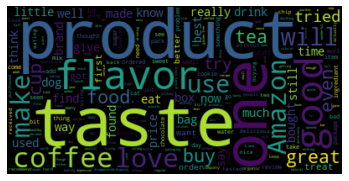

In [113]:
plt.imshow(wordcloud, interpolation='bilinear')
fig = plt.figure(1, figsize=(8, 4))
plt.axis("off")
#plt.savefig('wordcloud11.png')
plt.show()

### Popular words: taste, product, love, good, Amazon. These are mostly positive, also most reviews in the dataset express a positive sentiment.

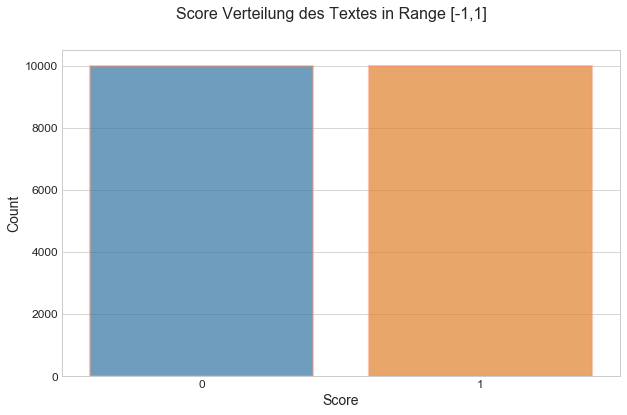

In [114]:
fig = plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')

fig.suptitle('Score Verteilung des Textes in Range [-1,1]', fontsize=16)
ax1 = fig.add_subplot(111)

plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

ax1 = sns.countplot(df.label, edgecolor='#fc9272', linewidth=1.5, alpha=0.7)

ax1.set_xlabel("Score", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)


#sns.countplot('sentiment', data=df)
#plt.title("Score Verteilung des Textes", fontsize=16)
#plt.xlabel('Score', fontsize=12)
#plt.ylabel('Count', fontsize=12)
plt.savefig("score_verteilung_without_neutral.png", format='png', dpi=150)
#plt.legend(['asdasd'])
#plt.show()

In [104]:
df.drop_duplicates(subset=['label', 'review'], keep='first', inplace=True)

In [105]:
pos_df = df.loc[df.label==1,:][:10000]
neg_df = df.loc[df.label==0,:][:10000]
df = pd.concat([pos_df,neg_df],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True) #perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets. df = df.reindex(np.random.permutation(df.index))  
df.head()

,review,label
0,"Ginger, lemon and honey seem a natural flavor ...",0
1,I wasted a little over $15.00 because the revi...,0
2,"Human-grade chicken, all organic dog food. Th...",1
3,My husband is a pretzel lover and has become a...,1
4,Where do you put your k-cups? Right F'ing here...,1


## Data Distribution

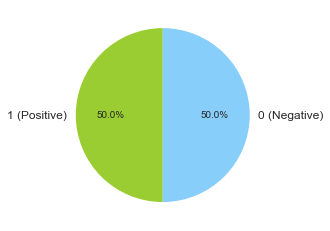

In [106]:
pie_label = ["1 (Positive)","0 (Negative)"]
pie_colors = ["yellowgreen", "lightskyblue"]
plt.pie(df.label.value_counts(), labels=pie_label, colors=pie_colors, startangle=90, autopct='%.1f%%')
plt.show()

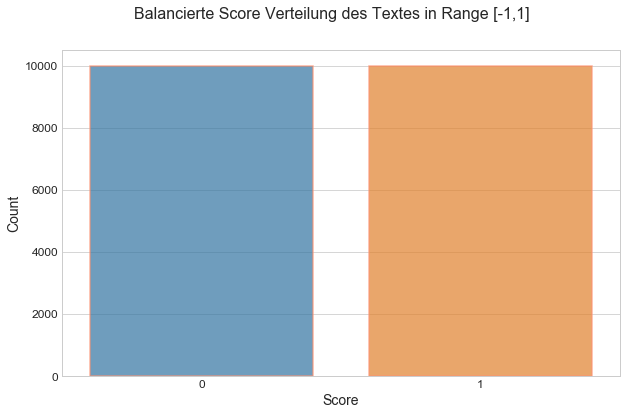

In [107]:
fig = plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')

fig.suptitle('Balancierte Score Verteilung des Textes in Range [-1,1]', fontsize=16)
ax1 = fig.add_subplot(111)

plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

ax1 = sns.countplot(df.label, edgecolor='#fc9272', linewidth=1.5, alpha=0.7)

ax1.set_xlabel("Score", fontsize=14)
ax1.set_ylabel("Count", fontsize=14)
plt.savefig("score_verteilung_balanciert.png", format='png', dpi=150)

In [109]:
len(df)

20000

## Data Preprocessing

In [17]:
# all reviews charackters converts to lowercase
df['review'] = df.review.apply(lambda x : x.lower()) 

In [18]:
df.head()

,review,label
0,the nuts were stale and tastless. i tried to g...,0
1,i usually drink twinnings or bigelow english b...,0
2,"i found this stuff to be very tasty, great wit...",1
3,...after paying the shipping the item cost ove...,0
4,i just did a test run for a work party and i s...,1


In [19]:
# remove the numbers in reviews
df['review'] = df.review.apply(lambda x : re.sub(r'\d+','',x)) 

In [20]:
 # remove the punctuations in reviews
df['review'] = df.review.apply(lambda x: re.sub(r'[^\w\s]', ' ',x))

In [21]:
df.head()

,review,label
0,the nuts were stale and tastless i tried to g...,0
1,i usually drink twinnings or bigelow english b...,0
2,i found this stuff to be very tasty great wit...,1
3,after paying the shipping the item cost ove...,0
4,i just did a test run for a work party and i s...,1


In [22]:
# remove whitespaces
df['review'] = df.review.apply(lambda x: x.strip()) 

In [23]:
df

,review,label
0,the nuts were stale and tastless i tried to g...,0
1,i usually drink twinnings or bigelow english b...,0
2,i found this stuff to be very tasty great wit...,1
3,after paying the shipping the item cost over ...,0
4,i just did a test run for a work party and i s...,1
...,...,...
19995,love the snack wanted to buy a bunch p ship...,1
19996,not happy with the product once they were co...,0
19997,of course the problem that we have my wife a...,0
19998,i ordered this because the title says ice crea...,0


# ML & DL Models

In [ ]:
import time

In [32]:
X = df['review']
y = df['label']

In [64]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [65]:
X_train_raw.shape, y_train.shape, X_test_raw.shape, y_test.shape

((14000,), (14000,), (6000,), (6000,))

In [66]:
# Create an object of class CountVectorizer
bow = CountVectorizer()
# Call the fit_transform method on training data
X_train = bow.fit_transform(X_train_raw.values)

In [67]:
X_test = bow.transform(X_test_raw.values)

In [68]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=False)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [70]:
from sklearn.metrics import accuracy_score
start = time.time()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
end = time.time()
print(end - start)

1.0764610767364502


In [71]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2945
           1       0.87      0.85      0.86      3055

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



In [72]:
acc

85.85000000000001

In [73]:
import time
from sklearn.model_selection import cross_val_score

start = time.time()
# creating list of C
C_values = np.linspace(0.1,1,10)

cv_scores = [] # empty list that will hold cv scores

# Try each value of alpha in the below loop
for c in C_values:
    # Create an object of the class Logistic Regression with balanced class weights
    clf = LogisticRegression(C = c, class_weight = 'balanced')
    # perform 5-fold cross validation
    # It returns the cv accuracy for each fold in a list
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    # Store the mean of the accuracies from all the 5 folds
    cv_scores.append(scores.mean())

# calculate misclassification error from accuracy (error = 1 - accuracy)
cv_error = [1 - x for x in cv_scores]

# optimal (best) C is the one for which error is minimum (or accuracy is maximum)
optimal_C = C_values[cv_error.index(min(cv_error))]
print('\nThe optimal alpha is', optimal_C)

end = time.time()
print("Total time in minutes = ", (end-start)/60)


The optimal alpha is 0.1
Total time in minutes =  0.82484397093455


In [60]:
clf = LogisticRegression(C = optimal_C)
start = time.time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
end = time.time()
print((end-start)/60)

Accuracy = 88.91666666666667
0.02165000836054484


In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2977
           1       0.90      0.88      0.89      3023

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



## Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
start = time.time()
# creating odd list of alpha for NB
alpha = np.linspace(1,10,10)

cv_scores = [] # empty list that will hold cv scores

# Try each value of alpha in the below loop
for a in alpha:
    # Create an object of the class KNeighborsClassifier
    clf = MultinomialNB(alpha = a)
    # perform 5-fold cross validation
    # It returns the cv accuracy for each fold in a list
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    # Store the mean of the accuracies from all the 5 folds
    cv_scores.append(scores.mean())

# calculate misclassification error from accuracy (error = 1 - accuracy)
cv_error = [1 - x for x in cv_scores]

# optimal (best) k is the one for which error is minimum (or accuracy is maximum)
optimal_alpha = alpha[cv_error.index(min(cv_error))]
print('\nThe optimal alpha is', optimal_alpha)

end = time.time()
print("Total time in minutes = ", (end-start)/60)


The optimal alpha is 10.0
Total time in minutes =  0.02348324457804362


In [75]:
clf = MultinomialNB(alpha = optimal_alpha)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

print(end-start)

Accuracy = 77.46666666666667
0.015500068664550781


In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2964
           1       0.78      0.76      0.77      3036

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



## Suppor Vector Machine

In [77]:
from sklearn.svm import SVC
svc = SVC()

In [78]:
start = time.time()
svc.fit(X_train, y_train)
end = time.time()
print(end-start)

402.8196473121643


In [80]:
pred_svc = svc.predict(X_test)

In [81]:
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2942
           1       0.86      0.83      0.85      3058

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
#max_depth=4, min_samples_leaf=20, min_samples_split=5

In [38]:
start = time.time()
dt.fit(X_train, y_train)
end = time.time()

In [39]:
print(end-start)

10.389592409133911


In [40]:
pred_dt = dt.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2995
           1       0.75      0.74      0.74      3005

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



## Preparing the Embedding Layer and LSTM

In [28]:
from sklearn.model_selection import train_test_split
import time
X = df['review']
y = df['label']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the tokenizer with a 5000 word limit. This is the number of words we would like to encode
tokenizer = Tokenizer(num_words=5000)

# we call fit_on_texts to create associations of words and numbers
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train) 
x_test = tokenizer.texts_to_sequences(x_test)

In [26]:
vocab_size = len(tokenizer.word_index) + 1
max_review_length = 200

x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)
print(x_train.shape)

(16000, 200)


In [29]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length = max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

start = time.time()
# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
#Results
start = time.time()
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))
end = time.time()
print(end-start)

Epoch 1/5
125/125 [==============================] - 50s 378ms/step - loss: 0.4991 - accuracy: 0.7496 - val_loss: 0.3663 - val_accuracy: 0.8587
Epoch 2/5
125/125 [==============================] - 45s 361ms/step - loss: 0.2620 - accuracy: 0.8997 - val_loss: 0.2964 - val_accuracy: 0.8823
Epoch 3/5
125/125 [==============================] - 45s 363ms/step - loss: 0.1986 - accuracy: 0.9270 - val_loss: 0.2988 - val_accuracy: 0.8842
Epoch 4/5
125/125 [==============================] - 56s 450ms/step - loss: 0.1634 - accuracy: 0.9418 - val_loss: 0.3074 - val_accuracy: 0.8857
Epoch 5/5
125/125 [==============================] - 57s 454ms/step - loss: 0.1367 - accuracy: 0.9515 - val_loss: 0.3268 - val_accuracy: 0.8860
Test Score: 0.32684314250946045
Test Accuracy: 0.8859999775886536
Accuracy: 88.60%


NameError: name 'end' is not defined

## Backup

In [ ]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

In [ ]:
vectorizer.transform(sentences).toarray()

In [ ]:
# machine cannot understand characters and words. So when dealing with text data we need to represent it in
# numbers to be understood by the machine.
# Countvectorizer is a method to convert text to numerical data. 
# Example:

In [ ]:
text = ['Hello my name is james, this is my python notebook']

In [ ]:

vectorizer.fit_transform(text).toarray()

In [ ]:
text = ['Hello my name is james',
'james this is my python notebook',
'james trying to create a big dataset',
'james of words to try differnt',
'features of count vectorizer']

In [ ]:
coun_vect = CountVectorizer(lowercase=False)
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())

In [ ]:
df

In [ ]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()

df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df

In [ ]:
vectorizer = CountVectorizer()
vectorizer_matrix = vectorizer.fit_transform(example_text)
vectorizer_array = vectorizer_matrix.toarray()

In [ ]:
df = pd.DataFrame(data=vectorizer_array, columns = vectorizer.get_feature_names())

In [ ]:
df

In [ ]:
text = ['Hello my name is james',
'james this is my python notebook',
'james trying to create a big dataset',
'james of words to try differnt',
'features of count vectorizer']

In [ ]:
coun_vect = CountVectorizer(stop_words = ['is', 'to', 'my'])
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()

In [ ]:
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df

In [ ]:
coun_vect = CountVectorizer(stop_words = 'english')
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()

In [ ]:
df = pd.DataFrame(data=count_array, columns=coun_vect.get_feature_names())

In [ ]:
coun_vect.vocabulary_

In [ ]:
 text = [
         "I have bought several of the Vitality canned",
         "This taffy is so good. It is very soft",
         "good flavor. this came securely packed"
]

In [ ]:
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(text)
count_array = count_matrix.toarray()

In [ ]:
df = pd.DataFrame(data=count_array, columns=vectorizer.get_feature_names())

In [ ]:
df